# **Climate Change in American Publications**
based on https://www.dataquest.io/blog/tutorial-text-analysis-python-test-hypothesis/

In [1]:
import pandas as pd

articles = pd.read_csv("https://raw.githubusercontent.com/avnerkantor/Introduction-to-Data-Science-for-Gov/main/articles_light.csv")

In [2]:
len(articles)

3750

In [3]:
articles.head()

,title,publication,year,content
0,The Strange Friendship of Martin McGuinness an...,Atlantic,2017.0,One was a crusty Protestant firebrand from Ant...
1,‘What the Russians Did Was Utterly Unprecedented’,Atlantic,2016.0,Well before the White House or U. S. intellige...
2,The Boss Baby Missed the Memo,Atlantic,2017.0,"Storks Is a Kids’ Movie That Is Not for Kids, ..."
3,The Atlantic Daily: Clashing With Patriots,Atlantic,2017.0,Opposing Trump: The Ninth Circuit Court of App...
4,Where Are All the Principals of Color?,Atlantic,2016.0,", I want to receive updates from partners and ..."


In [4]:
articles.publication.unique()

array(['Atlantic', 'Breitbart', 'Business Insider', 'Buzzfeed News',
       'CNN', 'Fox News', 'Guardian', 'National Review', 'New York Post',
       'New York Times', 'NPR', 'Reuters', 'Talking Points Memo', 'Vox',
       'Washington Post'], dtype=object)

In [5]:
articles['year'].min()

2012.0

In [6]:
articles['year'].max()

2017.0

In [7]:
articles['year'].value_counts()

2016.0    2296
2017.0    1239
2015.0      73
2013.0       4
2014.0       3
2012.0       2
Name: year, dtype: int64

In [8]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [9]:
import string
import re

articles['tokenized'] = articles['content'].astype(str).map(lambda x: clean_text(x))

In [10]:
articles['tokenized'].head()

0    one was a crusty protestant firebrand from ant...
1    well before the white house or u s intelligenc...
2    storks is a kids movie that is not for kids di...
3    opposing trump the ninth circuit court of appe...
4     i want to receive updates from partners and s...
Name: tokenized, dtype: object

In [11]:
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
articles['num_wds'].mean()

780.1330666666667

In [12]:
articles['num_wds'].max()

8929

In [13]:
articles['num_wds'].min()

0

In [14]:
len(articles[articles['num_wds']==0])

5

In [15]:
articles = articles[articles['num_wds']>0]
articles['num_wds'].mean()

781.1746328437918

In [16]:
articles['num_wds'].min()

1

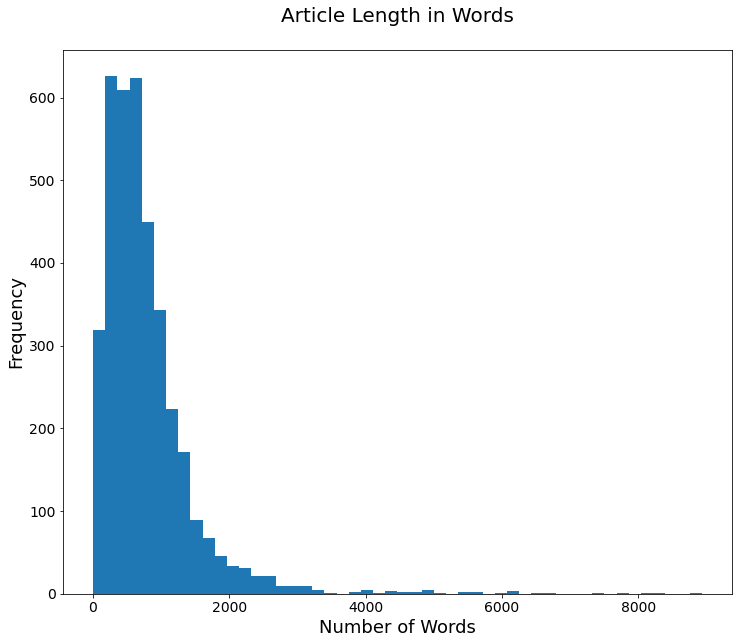

In [17]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [18]:
articles['uniq_wds'] = articles['tokenized'].str.split().apply(lambda x: len(set(x)))
articles['uniq_wds'].head()

0    510
1    956
2    529
3    554
4    530
Name: uniq_wds, dtype: int64

In [19]:
articles['uniq_wds'].mean()

354.4926568758344

In [20]:
articles['uniq_wds'].min()

1

In [21]:
articles['uniq_wds'].max()

2295

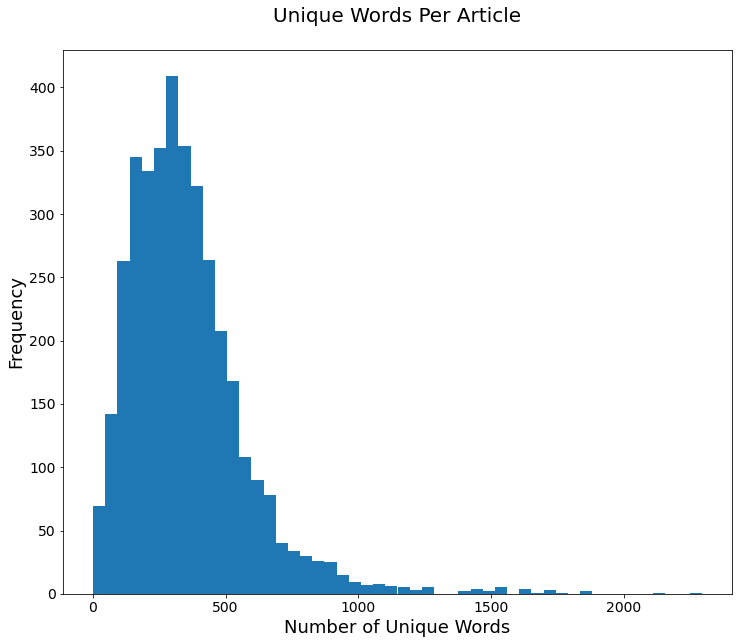

In [22]:
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

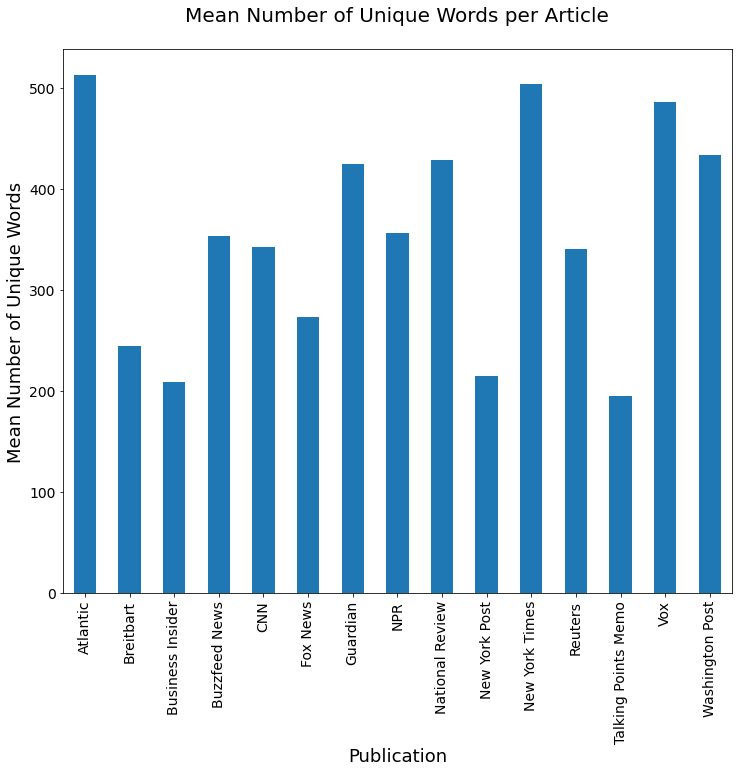

In [23]:
import numpy as np

art_grps = articles.groupby('publication')

ax=art_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Number of Unique Words per Article\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

In [24]:
from collections import Counter

wd_counts = Counter()
for i, row in articles.iterrows():
    wd_counts.update(row['tokenized'].split())

In [25]:
wd_counts.most_common(20)

[('the', 169352),
 ('to', 83547),
 ('of', 75435),
 ('a', 72048),
 ('and', 71376),
 ('in', 59429),
 ('that', 40870),
 ('is', 28047),
 ('for', 27397),
 ('on', 25157),
 ('it', 20911),
 ('was', 20057),
 ('he', 19731),
 ('with', 19723),
 ('as', 18597),
 ('said', 15150),
 ('his', 14789),
 ('but', 14291),
 ('at', 14066),
 ('have', 13685)]

In [26]:
import nltk
nltk.download('stopwords')
  
from nltk.corpus import stopwords

for sw in stopwords.words('english'):
    del wd_counts[sw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
wd_counts.most_common(20)

[('said', 15150),
 ('trump', 10480),
 ('would', 7540),
 ('one', 7447),
 ('people', 6967),
 ('new', 5619),
 ('like', 5335),
 ('also', 5003),
 ('president', 4392),
 ('time', 4056),
 ('could', 4035),
 ('first', 3693),
 ('even', 3621),
 ('years', 3544),
 ('two', 3472),
 ('many', 3373),
 ('us', 3325),
 ('state', 3224),
 ('clinton', 3186),
 ('states', 3101)]

In [28]:
disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate)|(climate\W+(?:\w+\W+){1,5}?chang)')

In [29]:
disj.match('climate is changing')

<re.Match object; span=(0, 16), match='climate is chang'>

In [30]:
disj.match('change in extreme  climate')

<re.Match object; span=(0, 26), match='change in extreme  climate'>

In [31]:
disj.match('nothing changing here except the weather')

In [32]:
def find_cc_wds(content, cc_wds=['climate change','global warming', 'extreme weather', 'greenhouse gas'
                                 'clean energy', 'clean tech', 'renewable energy']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    if not found:
        disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate) | (climate\W+(?:\w+\W+){1,5}?chang)')
        if disj.match(content):
            found = True
    return found

In [33]:
articles['cc_wds'] = articles['tokenized'].apply(find_cc_wds)
articles['cc_wds'].head()

0    False
1    False
2    False
3    False
4    False
Name: cc_wds, dtype: bool

In [34]:
articles['cc_wds'].sum() / len(articles)

0.03124165554072096

In [35]:
art_grps['cc_wds'].sum()

publication
Atlantic               12
Breitbart               5
Business Insider        3
Buzzfeed News           2
CNN                     8
Fox News                4
Guardian               10
NPR                     9
National Review        10
New York Post           2
New York Times         10
Reuters                13
Talking Points Memo     4
Vox                    20
Washington Post         5
Name: cc_wds, dtype: int64

In [36]:
art_grps['cc_wds'].count()

publication
Atlantic               250
Breitbart              250
Business Insider       246
Buzzfeed News          250
CNN                    250
Fox News               250
Guardian               250
NPR                    250
National Review        249
New York Post          250
New York Times         250
Reuters                250
Talking Points Memo    250
Vox                    250
Washington Post        250
Name: cc_wds, dtype: int64

In [37]:
proportions = art_grps['cc_wds'].sum() / art_grps['cc_wds'].count()
proportions.sort_values(ascending=True)
proportions

publication
Atlantic               0.048000
Breitbart              0.020000
Business Insider       0.012195
Buzzfeed News          0.008000
CNN                    0.032000
Fox News               0.016000
Guardian               0.040000
NPR                    0.036000
National Review        0.040161
New York Post          0.008000
New York Times         0.040000
Reuters                0.052000
Talking Points Memo    0.016000
Vox                    0.080000
Washington Post        0.020000
Name: cc_wds, dtype: float64

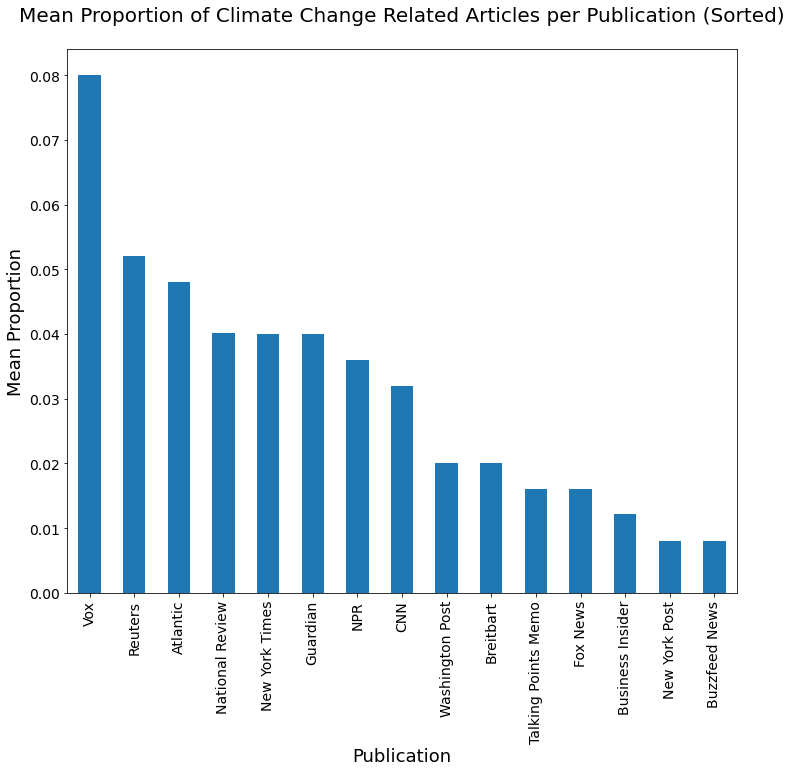

In [38]:
ax=proportions.sort_values(ascending=False).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Proportion of Climate Change Related Articles per Publication (Sorted)\n', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

In [39]:
#liberal, conservative, and center
bias_assigns = {'Atlantic': 'left', 'Breitbart': 'right', 'Business Insider': 'left', 'Buzzfeed News': 'left', 'CNN': 'left', 'Fox News': 'right',
                'Guardian': 'left', 'National Review': 'right', 'New York Post': 'right', 'New York Times': 'left',
                'NPR': 'left', 'Reuters': 'center', 'Talking Points Memo': 'left', 'Washington Post': 'left', 'Vox': 'left'}
articles['bias'] = articles['publication'].apply(lambda x: bias_assigns[x])

articles.head()

,title,publication,year,content,tokenized,num_wds,uniq_wds,cc_wds,bias
0,The Strange Friendship of Martin McGuinness an...,Atlantic,2017.0,One was a crusty Protestant firebrand from Ant...,one was a crusty protestant firebrand from ant...,1173,510,False,left
1,‘What the Russians Did Was Utterly Unprecedented’,Atlantic,2016.0,Well before the White House or U. S. intellige...,well before the white house or u s intelligenc...,3789,956,False,left
2,The Boss Baby Missed the Memo,Atlantic,2017.0,"Storks Is a Kids’ Movie That Is Not for Kids, ...",storks is a kids movie that is not for kids di...,1344,529,False,left
3,The Atlantic Daily: Clashing With Patriots,Atlantic,2017.0,Opposing Trump: The Ninth Circuit Court of App...,opposing trump the ninth circuit court of appe...,991,554,False,left
4,Where Are All the Principals of Color?,Atlantic,2016.0,", I want to receive updates from partners and ...",i want to receive updates from partners and s...,1254,530,False,left


In [40]:
bias_groups = articles.groupby('bias')
bias_proportions = bias_groups['cc_wds'].sum() / bias_groups['cc_wds'].count()

In [41]:
bias_groups['cc_wds'].count()

bias
center     250
left      2496
right      999
Name: cc_wds, dtype: int64

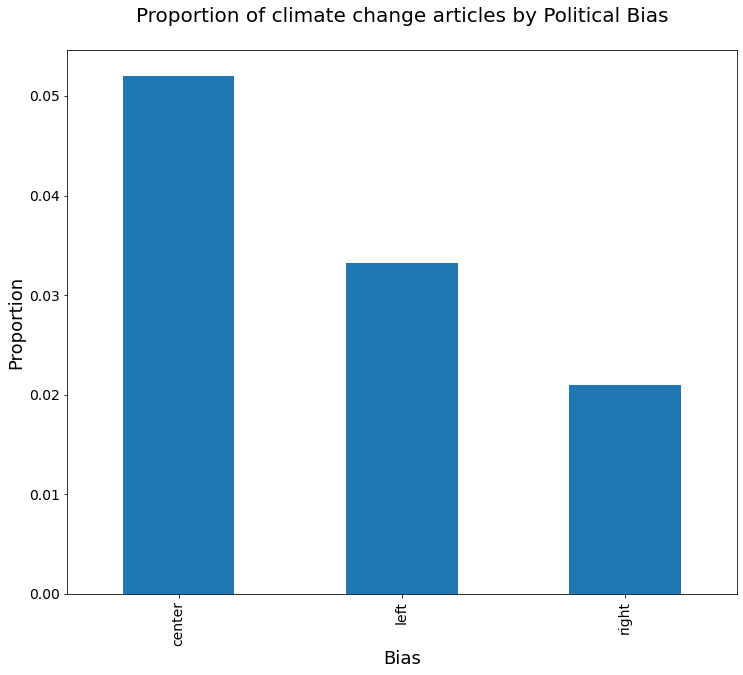

In [42]:
ax=bias_proportions.plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Proportion of climate change articles by Political Bias\n', fontsize=20)
ax.set_xlabel('Bias', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18);